In [0]:
import matplotlib
from shapely.geometry import Polygon, LinearRing
import matplotlib.pyplot as plt
from random import random
from random import seed
from random import randint

## Polygon

list

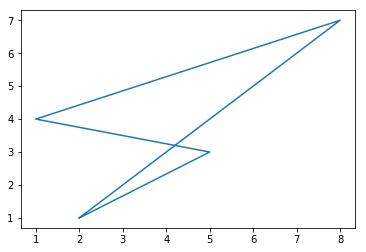

In [0]:
polygon = Polygon([(randint(0, 10),randint(0, 10)), (randint(0, 10), randint(0, 10)), (randint(0, 10),randint(0, 10)), (randint(0, 10),randint(0, 10))])
x,y = polygon.exterior.xy
z=plt.plot(x,y)
type(z)

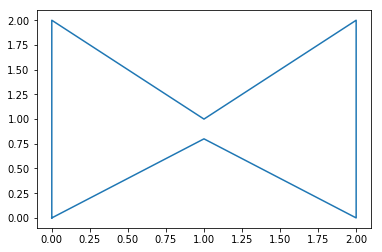

In [0]:
ring = LinearRing([(0, 0), (0, 2), (1, 1),
    (2, 2), (2, 0), (1, 0.8), (0, 0)])
x, y = ring.xy
plt.plot(x, y)

## Points

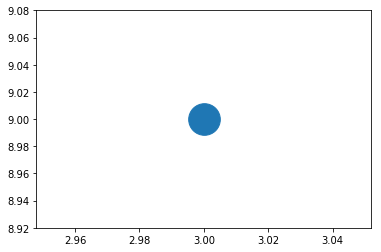

In [0]:
plt.scatter (3, 9, s=1000)

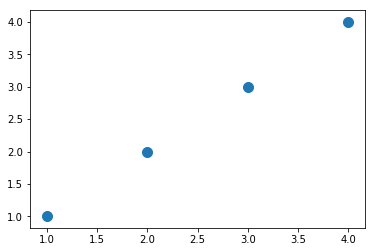

In [0]:
x_points = [1, 2, 3, 4]
y_points = [1, 2, 3, 4]
plt.scatter(x_points, y_points, s = 100)

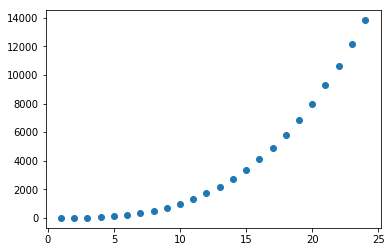

In [0]:
x_points = list(range(1, 25))
y_points = [x**3 for x in x_points]
plt.scatter(x_points, y_points)

## Line

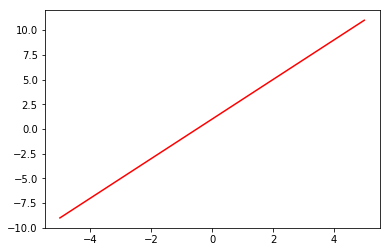

In [0]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


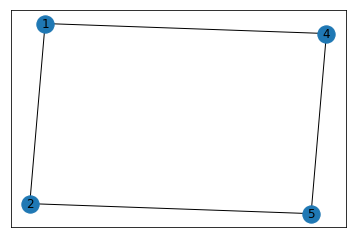

In [0]:
import networkx as nx
G = nx.Graph([(1,2), (2, 5), (5, 4), (4, 1)])
nx.draw_networkx(G)
A = nx.adjacency_matrix(G)
print(A.todense())

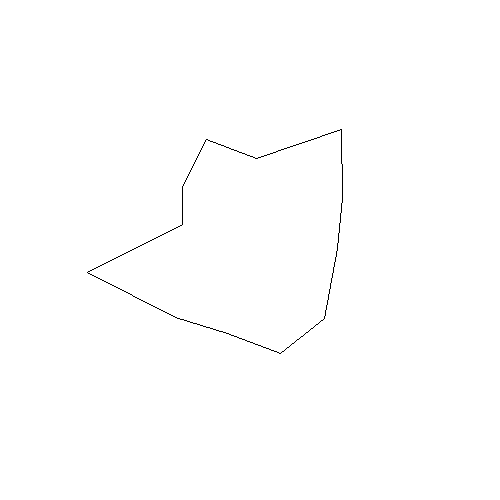

In [69]:
import math, random
from IPython.display import display
from PIL import Image, ImageDraw

def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :


    irregularity = clip( irregularity, 0,1 ) * 2*math.pi / numVerts
    spikeyness = clip( spikeyness, 0,1 ) * aveRadius

    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp

    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k

    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i = clip( random.gauss(aveRadius, spikeyness), 0, 2*aveRadius )
        x = ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )

        angle = angle + angleSteps[i]

    return points
def clip(x, min, max) :
    if( min > max ) :  return x    
    elif( x < min ) :  return min
    elif( x > max ) :  return max
    else :             return x



verts = generatePolygon( ctrX=250, ctrY=250, aveRadius=100, irregularity=0.35, spikeyness=0.2, numVerts=12 )

black = (0,0,0)
white=(255,255,255)
im = Image.new('RGB', (500, 500), white)
imPxAccess = im.load()
draw = ImageDraw.Draw(im)
tupVerts = list(map(tuple,verts))

# either use .polygon(), if you want to fill the area with a solid colour
draw.polygon( tupVerts, outline=black,fill=white )

# or .line() if you want to control the line thickness, or use both methods together!
draw.line( tupVerts+[tupVerts[0]], width=1, fill=black )

display(im)

## Random Polygon

Our strategy is to make a plan where we are sure that the polygon includes all points, and that we can find an order to connect them where none of the lines intersect.

Algorithm:
1. Find the leftmost points p
2. Find the rightmost point q
3. Partition the points into A, the set of points below pq, and B, the set of points above pq [you can use the left turn test on (p,q,?) to determine if a point is above the line].
4. Sort A by x-coordinate (increasing)
5. Sort B by x-coordinate (decreasing).
6. Return the polygon defined by p, the points in A, in order, q, the points of B in order.

Runtime:
Steps 1,2,3 take O(n) time.
Steps 4,5 take O(nlogn) time.
Step 6 take O(n) time.
Total runtime is O(nlogn).

Correctness:
By construction, all points besides p,q are in set A or set B. Our output polygon from line 6 therefore outputs a polygon with all the points. We now need to argue that none of the line segments in our output polygon intersect each other.

Consider each segment in the output polygon. The first edge from p to the first point in A can't intersect any segment (because there is no segment yet). As we proceed in order by x-coordinate through the points in A, from each point, the next segment is going to the right, and all previous segments are to the left. Thus, as we go from p, through all the points of A, to point q, we will have no intersections.

The same is true as we go from q back through the points of B. These segments cannot intersect each other because they proceed from right to left. These segments also cannot intersect anything in A because all points in A are below line pq, and all points in B are above this line.

Thus, no segments intersect each other and we have a simple polygon.

[(695, 165), (12, 105), (129, 862), (541, 35), (947, 443), (730, 737), (650, 318)]


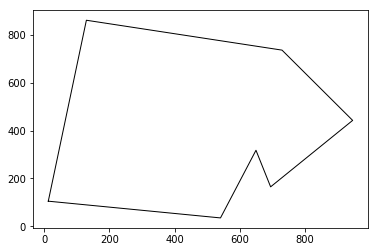

In [0]:
from random import randint
from operator import itemgetter
import numpy
import matplotlib
import matplotlib.pyplot

class Create_random_polygon:

    def __init__(self, array, min_rand_coord = None, max_rand_coord = None, points_num = None):        
        self.array = array
        self.min_rand_coord = min_rand_coord 
        self.max_rand_coord = max_rand_coord
        self.points_num = points_num

    def generate_random_points(self):
        random_coords_list = []
        for x in range(self.points_num):
            coords_tuple = (randint(self.min_rand_coord, self.max_rand_coord),
                            randint(self.min_rand_coord, self.max_rand_coord))
            random_coords_list.append(coords_tuple)
        self.array = random_coords_list
        return random_coords_list

    def close_line_to_polygon(self):
        a = self.array[0]
        b = self.array[len(self.array)-1]
        if a == b:
            pass
        else:
            self.array.append(a)    

    def find_leftmost_point(self):
        leftmost_point = None
        leftmost_x = None
        for point in self.array:
            x = point[0]
            if leftmost_x == None or x < leftmost_x:
                leftmost_x = x
                leftmost_point = point
        return leftmost_point

    def find_rightmost_point(self):
        rightmost_point = None
        rightmost_x = None
        for point in self.array:
            x = point[0]
            if rightmost_x == None or x > rightmost_x:
                rightmost_x = x
                rightmost_point = point
        return rightmost_point

    def is_point_above_the_line(self, point, line_points):
        """return 1 if point is above the line
           return -1 if point is below the line
           return  0 if point is lies on the line"""
        px, py = point
        P1, P2 = line_points
        P1x, P1y = P1[0], P1[1]
        P2x, P2y = P2[0], P2[1]
        array = numpy.array([
            [P1x - px, P1y - py],
            [P2x - px, P2y - py],
            ])
        det = numpy.linalg.det(array)
        sign = numpy.sign(det)
        return sign

    def sort_array_into_A_B_C(self, line_points):
        [(x_lm, y_lm), (x_rm, y_rm)] = line_points
        A_array, B_array, C_array = [], [], []
        for point in self.array:
            x, y = point
            sing = self.is_point_above_the_line( (x, y), line_points)
            if sing == 0:
                C_array.append(point)
            elif sing == -1:
                A_array.append(point)
            elif sing == 1:
                B_array.append(point)
        return A_array, B_array, C_array

    def sort_and_merge_A_B_C_arrays(self, A_array, B_array, C_array):
        A_C_array = [*A_array, *C_array]
        A_C_array.sort(key=itemgetter(0))
        B_array.sort(key=itemgetter(0), reverse=True)        
        merged_arrays = [*A_C_array, *B_array]
        self.array = merged_arrays

    def show_image(self, array, line_points, A_array, B_array, C_array):
        [(x_lm, y_lm), (x_rm, y_rm)] = line_points        
        x = [x[0] for x in array]
        y = [y[1] for y in array]
        #Ax = [x[0] for x in A_array]
        #Ay = [y[1] for y in A_array]
        #Bx = [x[0] for x in B_array]
        #By = [y[1] for y in B_array]
        #Cx = [x[0] for x in C_array]
        #Cy = [y[1] for y in C_array]          
        #matplotlib.pyplot.plot(Ax, Ay, 'o', c='orange') # below the line
        #matplotlib.pyplot.plot(Bx, By, 'o', c='blue') # above the line
        #matplotlib.pyplot.plot(Cx, Cy, 'o', c='black') # on the line
        #matplotlib.pyplot.plot(x_lm, y_lm, 'o', c='green') # leftmost point
        #matplotlib.pyplot.plot(x_rm, y_rm, 'o', c='red') # rightmost point
        #x_plot = matplotlib.pyplot.plot([x_lm, x_rm], [y_lm, y_rm], linestyle=':', color='black', linewidth=0.5) # polygon's division line
        x_plot = matplotlib.pyplot.plot(x, y, color='black', linewidth=1) # connect points by line in order of apperiance        
        matplotlib.pyplot.show()

    def main(self, plot = False):
        'First output is random polygon coordinates array (other stuff for ploting)'
        #print(self.array)
        if self.array == None:
            if not all(
                [isinstance(min_rand_coord, int),
                 isinstance(max_rand_coord, int),
                 isinstance(points_num, int),]
                ):
                print('Error! Values must be "integer" type:', 'min_rand_coord =',min_rand_coord, ', max_rand_coord =',max_rand_coord, ', points_num =',points_num)
            else:                
                self.array = self.generate_random_points()            

        print(self.array)
        x_lm, y_lm = self.find_leftmost_point()
        x_rm, y_rm = self.find_rightmost_point()
        line_points = [(x_lm, y_lm), (x_rm, y_rm)]

        A_array, B_array, C_array = self.sort_array_into_A_B_C(line_points)
        self.sort_and_merge_A_B_C_arrays(A_array, B_array, C_array)
        self.close_line_to_polygon()
        if plot:
            self.show_image(self.array, line_points, A_array, B_array, C_array)
        return self.array

if __name__ == "__main__":
    # predefined polygon
        
    array = None # no predefined polygon
    min_rand_coord = 1
    max_rand_coord = 1000
    points_num = 7
    

    crt = Create_random_polygon(array, min_rand_coord, max_rand_coord, points_num)
    polygon_array = crt.main(plot = True) 

[(34, 965), (123, 229), (165, 673), (313, 13), (361, 41), (445, 25), (474, 25), (738, 165), (629, 383), (526, 591), (414, 678)]
[(34, 965), (123, 229), (165, 673), (313, 13), (361, 41), (445, 25), (474, 25), (738, 165), (629, 383), (526, 591), (414, 678)]


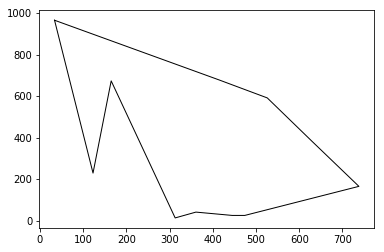

In [71]:
from random import randint
from operator import itemgetter
import numpy
import matplotlib
import matplotlib.pyplot

class Create_random_polygon:

    def __init__(self, array, min_rand_coord = None, max_rand_coord = None, points_num = None):        
        self.array = array
        self.min_rand_coord = min_rand_coord 
        self.max_rand_coord = max_rand_coord
        self.points_num = points_num

    def generate_random_points(self):
        random_coords_list = []
        for x in range(self.points_num):
            coords_tuple = (randint(self.min_rand_coord, self.max_rand_coord),
                            randint(self.min_rand_coord, self.max_rand_coord))
            random_coords_list.append(coords_tuple)
        self.array = random_coords_list
        return random_coords_list

    def close_line_to_polygon(self):
        a = self.array[0]
        b = self.array[len(self.array)-1]
        if a == b:
            pass
        else:
            self.array.append(a)    

    def find_leftmost_point(self):
        leftmost_point = None
        leftmost_x = None
        for point in self.array:
            x = point[0]
            if leftmost_x == None or x < leftmost_x:
                leftmost_x = x
                leftmost_point = point
        return leftmost_point

    def find_rightmost_point(self):
        rightmost_point = None
        rightmost_x = None
        for point in self.array:
            x = point[0]
            if rightmost_x == None or x > rightmost_x:
                rightmost_x = x
                rightmost_point = point
        return rightmost_point

    def is_point_above_the_line(self, point, line_points):
        """return 1 if point is above the line
           return -1 if point is below the line
           return  0 if point is lies on the line"""
        px, py = point
        P1, P2 = line_points
        P1x, P1y = P1[0], P1[1]
        P2x, P2y = P2[0], P2[1]
        array = numpy.array([
            [P1x - px, P1y - py],
            [P2x - px, P2y - py],
            ])
        det = numpy.linalg.det(array)
        sign = numpy.sign(det)
        return sign

    def sort_array_into_A_B_C(self, line_points):
        [(x_lm, y_lm), (x_rm, y_rm)] = line_points
        A_array, B_array, C_array = [], [], []
        for point in self.array:
            x, y = point
            sign = self.is_point_above_the_line( (x, y), line_points)
            if sign == 0:
                C_array.append(point)
            elif sign == -1:
                A_array.append(point)
            elif sign == 1:
                B_array.append(point)
        return A_array, B_array, C_array

    def sort_and_merge_A_B_C_arrays(self, A_array, B_array, C_array):
        A_C_array = [*A_array, *C_array]
        A_C_array.sort(key=itemgetter(0))
        B_array.sort(key=itemgetter(0), reverse=True)        
        merged_arrays = [*A_C_array, *B_array]
        self.array = merged_arrays

    def show_image(self, array, line_points, A_array, B_array, C_array):
        [(x_lm, y_lm), (x_rm, y_rm)] = line_points        
        x = [x[0] for x in array]
        y = [y[1] for y in array]
        x_plot = matplotlib.pyplot.plot(x, y, color='black', linewidth=1) # connect points by line in order of apperiance        
        matplotlib.pyplot.show()
        
    

    def main(self, plot = False):
        'First output is random polygon coordinates array (other stuff for ploting)'
                
        self.array = self.generate_random_points()
        #print(self.array)
        x_lm, y_lm = self.find_leftmost_point()
        x_rm, y_rm = self.find_rightmost_point()
        line_points = [(x_lm, y_lm), (x_rm, y_rm)]

        A_array, B_array, C_array = self.sort_array_into_A_B_C(line_points)   #A below B above C on the line
        self.sort_and_merge_A_B_C_arrays(A_array, B_array, C_array)
        print(self.array)
        vertices = self.array
        print (vertices)
        self.close_line_to_polygon()
        if plot:
            self.show_image(self.array, line_points, A_array, B_array, C_array)
        return self.array

if __name__ == "__main__":
    # predefined polygon
        
    array = None # no predefined polygon
    min_rand_coord = 1
    max_rand_coord = 1000
    points_num = 11
    

    crt = Create_random_polygon(array, min_rand_coord, max_rand_coord, points_num)
    polygon_array = crt.main(plot = True) 